https://medium.com/mlearning-ai/category-encoders-c2a9bb192f0a
#How to Encode Categorical Data
TASK: To Experiment and Implement Different Types of Encoding to deal with Categorical Data

#One hot Encoding using:

###Python’s category_encoding library
###Sklearn Preprocessing
###Python’s get_dummies

-------------------------------------------------------------------------------
Binary Encoding

Frequency Encoding

Label Encoding

Ordinal Encoding

------------------------------------------------------------------------
#What is Categorical data
Categorical data is a type of data that is used to **group information with similar characteristics** while Numerical data is a type of data that expresses information in the form of numbers.

###Example: Gender

#Why do we need Encoding?
Most of the Machine learning algorithms can not handle categorical variables unless we convert them to numerical values.
Many algorithm’s performances even vary based upon how the Categorical variables are encoded.

#Categorical variables can be divided into two categories:
###Nominal (No particular order)
###Ordinal (some ordered)

#Method: 1 Using Python’s category encoder library
**category_encoders** is an amazing python library that provides 15 different encoding schemes.

##Here, is the list of 15 types of encoding :
####One Hot Encoding
####Label Encoding
####Ordinal Encoding
####Helmert Encoding
####Binary Encoding
####Frequency Encoding
####Mean Encoding
####Weight of Evidence Encoding
####Probability Ratio Encoding
####Hashing Encoding
####Backward Difference Encoding
####Leave One Out Encoding
####James-Stein Encoding
####M-estimator Encoding
####Thermometer Encoder



In [ ]:
import pandas as pd
import sklearn

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.5 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce


In [ ]:
data = pd.DataFrame({ 'gender' : ['Male', 'Female', 'Male', 'Female', 'Female'],
                      'class' : ['A','B','C','D','A'],
                      'city' : ['Delhi','Gurugram','Delhi','Delhi','Gurugram'] })
data.head()

,gender,class,city
0,Male,A,Delhi
1,Female,B,Gurugram
2,Male,C,Delhi
3,Female,D,Delhi
4,Female,A,Gurugram


#Implementing One-Hot Encoding through **category_encoder**
In this method, **each category is mapped to a vector that contains 1 and 0 denoting the presence or absence of the feature.**

**The number of vectors depends on the number of categories for features.**

Create an object of the One Hot Encoder

In [ ]:
#from sklearn.preprocessing import OneHotEncoder

ce_OHE = ce.OneHotEncoder(cols=['gender','city'])

ce_OHE

OneHotEncoder(cols=['gender', 'city'])

In [ ]:
data1 = ce_OHE.fit_transform(data)
data1.head()

,gender_1,gender_2,class,city_1,city_2
0,1,0,A,1,0
1,0,1,B,0,1
2,1,0,C,1,0
3,0,1,D,1,0
4,0,1,A,0,1


#Binary Encoding
Binary encoding converts a category into binary digits. Each binary digit creates one feature column.

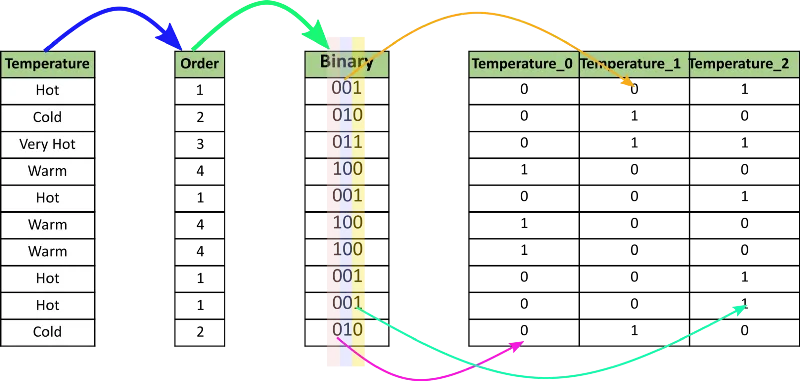

In [ ]:
ce_be = ce.BinaryEncoder(cols=['class']);
print(ce_be)

print(data['class'])

# transform the data
data_binary = ce_be.fit_transform(data["class"])
data_binary

BinaryEncoder(cols=['class'])
0    A
1    B
2    C
3    D
4    A
Name: class, dtype: object


,class_0,class_1,class_2
0,0,0,1
1,0,1,0
2,0,1,1
3,1,0,0
4,0,0,1


#Method 2: USING PYTHON’S GET DUMMIES


In [ ]:
pd.get_dummies(data,columns=["gender","city"])


,class,gender_Female,gender_Male,city_Delhi,city_Gurugram
0,A,0,1,1,0
1,B,1,0,0,1
2,C,0,1,1,0
3,D,1,0,1,0
4,A,1,0,0,1


In [ ]:
#Assigning Prefix if we want to. Though it takes the default prefix too!
pd.get_dummies(data,prefix=["gen","city"],columns=["gender","city"])


,class,gen_Female,gen_Male,city_Delhi,city_Gurugram
0,A,0,1,1,0
1,B,1,0,0,1
2,C,0,1,1,0
3,D,1,0,1,0
4,A,1,0,0,1


#METHOD 3: USING SKLEARN
sklearn also has 15 different types of inbuilt encoders, which can be accessed from sklearn.preprocessing.

###SKLEARN ONE HOT ENCODING

###Encode categorical features as a one-hot numeric array.

###One-hot encoding works by turning each category (level) of a categorical feature into its own binary feature.

In [ ]:
#lets first Get a list of categorical variables from our data
s = (data.dtypes == 'object')
print(s)

print("***************************")

cols = list(s[s].index)
cols

gender    True
class     True
city      True
dtype: bool
***************************


['gender', 'class', 'city']

In [ ]:
#Import Libraries
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

In [ ]:
#Applying on gender column
data_gender = pd.DataFrame(ohe.fit_transform(data[["gender"]]))

data_gender

,0,1
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0


In [ ]:
#Applying on City Column
data_city = pd.DataFrame(ohe.fit_transform(data[["city"]]))

data_city

,0,1
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [ ]:
#Applying on the class column
data_class = pd.DataFrame(ohe.fit_transform(data[["class"]]))

data_class

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0


In [ ]:
#Applying on the list of categorical variables:
data_cols = pd.DataFrame(ohe.fit_transform(data[cols]))

data_cols

,0,1,2,3,4,5,6,7
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


####here the first 2 columns represent gender, the next 4 columns represent class, and the remaining 2 of the city.

#SKLEARN Label Encoding
In label encoding, **each category is assigned a value from 1 through N where N is the number of categories for the feature.** There is **no relation or order between these assignments.**

In [ ]:
#Label encoder takes no arguments
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
print(le)
print(data)
print("**************************")

data['class'] = le.fit_transform(data[["class"]]);
data


LabelEncoder()
   gender class      city
0    Male     A     Delhi
1  Female     B  Gurugram
2    Male     C     Delhi
3  Female     D     Delhi
4  Female     A  Gurugram
**************************


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,gender,class,city
0,Male,0,Delhi
1,Female,1,Gurugram
2,Male,2,Delhi
3,Female,3,Delhi
4,Female,0,Gurugram


#ORDINAL ENCODING
Ordinal encoding’s encoded variables retain the ordinal(ordered) nature of the variable. It looks almost similar to Label Encoding. The only difference being Label coding doesn't consider whether a variable is ordinal or not, it will anyways assign a sequence of integers

#Example: Ordinal encoding will assign values as Very Good(1)<Good(2)<Bad(3)<Worse(4)
First, we need to assign the original order of the variable through a dictionary.

In [ ]:
temp = {'temperature' :['very cold', 'cold', 'warm', 'hot', 'very hot']}

df=pd.DataFrame(temp,columns=["temperature"])
print(df)

temp_dict = {
    'very cold': 1,
    'cold': 2,
    'warm': 3,
    'hot': 4,
    "very hot": 5
}
temp_dict

  temperature
0   very cold
1        cold
2        warm
3         hot
4    very hot


{'very cold': 1, 'cold': 2, 'warm': 3, 'hot': 4, 'very hot': 5}

In [ ]:
#Then we can map each row for the variable as per the dictionary.

df["temp_ordinal"] = df.temperature.map(temp_dict)
df

,temperature,temp_ordinal
0,very cold,1
1,cold,2
2,warm,3
3,hot,4
4,very hot,5


#Frequency Encoding
The category is assigned as per the frequency of value in its total lot.

In [ ]:
data_freq = pd.DataFrame({'class' : ['A','B','C','D','A',"B","E","E","D","C","C","C","E","A","A"]})
data_freq



,class
0,A
1,B
2,C
3,D
4,A
5,B
6,E
7,E
8,D
9,C


In [ ]:
#Grouping by class column

fe = data_freq.groupby("class").size()
fe

class
A    4
B    2
C    4
D    2
E    3
dtype: int64

In [ ]:
#Dividing by length

fe_ = fe/len(data_freq)
fe_

class
A    0.266667
B    0.133333
C    0.266667
D    0.133333
E    0.200000
dtype: float64

In [ ]:
#Mapping and Rounding off

data_freq["data_fe"] = data_freq["class"].map(fe_).round(2)
data_freq

,class,data_fe
0,A,0.27
1,B,0.13
2,C,0.27
3,D,0.13
4,A,0.27
5,B,0.13
6,E,0.20
7,E,0.20
8,D,0.13
9,C,0.27
